**About Project**

- The main objective is likely to build a deep learning model capable of accurately classifying images into one of the ten classes and calculate time when using GPU and CPU in training

- The CIFAR-10 dataset includes the following classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

**About Dataset**

- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

- The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

![image](https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/10_gpu_benchmarking/small_images.jpg)

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#This function is used to check whether the TensorFlow library was built with support for CUDA
import tensorflow as tf

if tf.test.is_built_with_cuda():
    print("TensorFlow was built with CUDA support.")
else:
    print("TensorFlow was not built with CUDA support.")


TensorFlow was built with CUDA support.


In [3]:
# Load the dataset
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
# Get the shape of x_train
print(f"The shape of x_train is {x_train.shape}")

The shape of x_train is (50000, 32, 32, 3)


In [5]:
# Print the number of images in x_train
print(f"The number of images in x_train is : {x_train.shape[0]} images ")

The number of images in x_train is : 50000 images 


In [6]:
# Get the size of each image in X_train
print(f"The size of each image in x_train is : {x_train.shape[1:3]}")

The size of each image in x_train is : (32, 32)


In [7]:
# Get the number of channels in each image X_train
print(f"The number of channel in each image is : {x_train.shape[3]} channels")
print("Three channels are :  Red - Green - Blue")

The number of channel in each image is : 3 channels
Three channels are :  Red - Green - Blue


In [8]:
# Get the shape of x_test
print(f"The shape of x_test is {x_test.shape}")

The shape of x_test is (10000, 32, 32, 3)


In [9]:
# Print the number of images in x_test
print(f"The number of images in x_test is : {x_test.shape[0]} images ")

The number of images in x_test is : 10000 images 


In [10]:
# Get the size of each image in X_test
print(f"The size of each image in x_test is : {x_test.shape[1:3]}")

The size of each image in x_test is : (32, 32)


In [11]:
# Get the number of channels in each image X_test
print(f"The number of channel in each image is : {x_test.shape[3]} channels")
print("Three channels are :  Red - Green - Blue")

The number of channel in each image is : 3 channels
Three channels are :  Red - Green - Blue


In [12]:
# Get the shape of y_train
print(f"The shape of y_train is {y_train.shape}")

The shape of y_train is (50000, 1)


In [13]:
# Get the shape of y_test
print(f"The shape of y_train is {y_test.shape}")

The shape of y_train is (10000, 1)


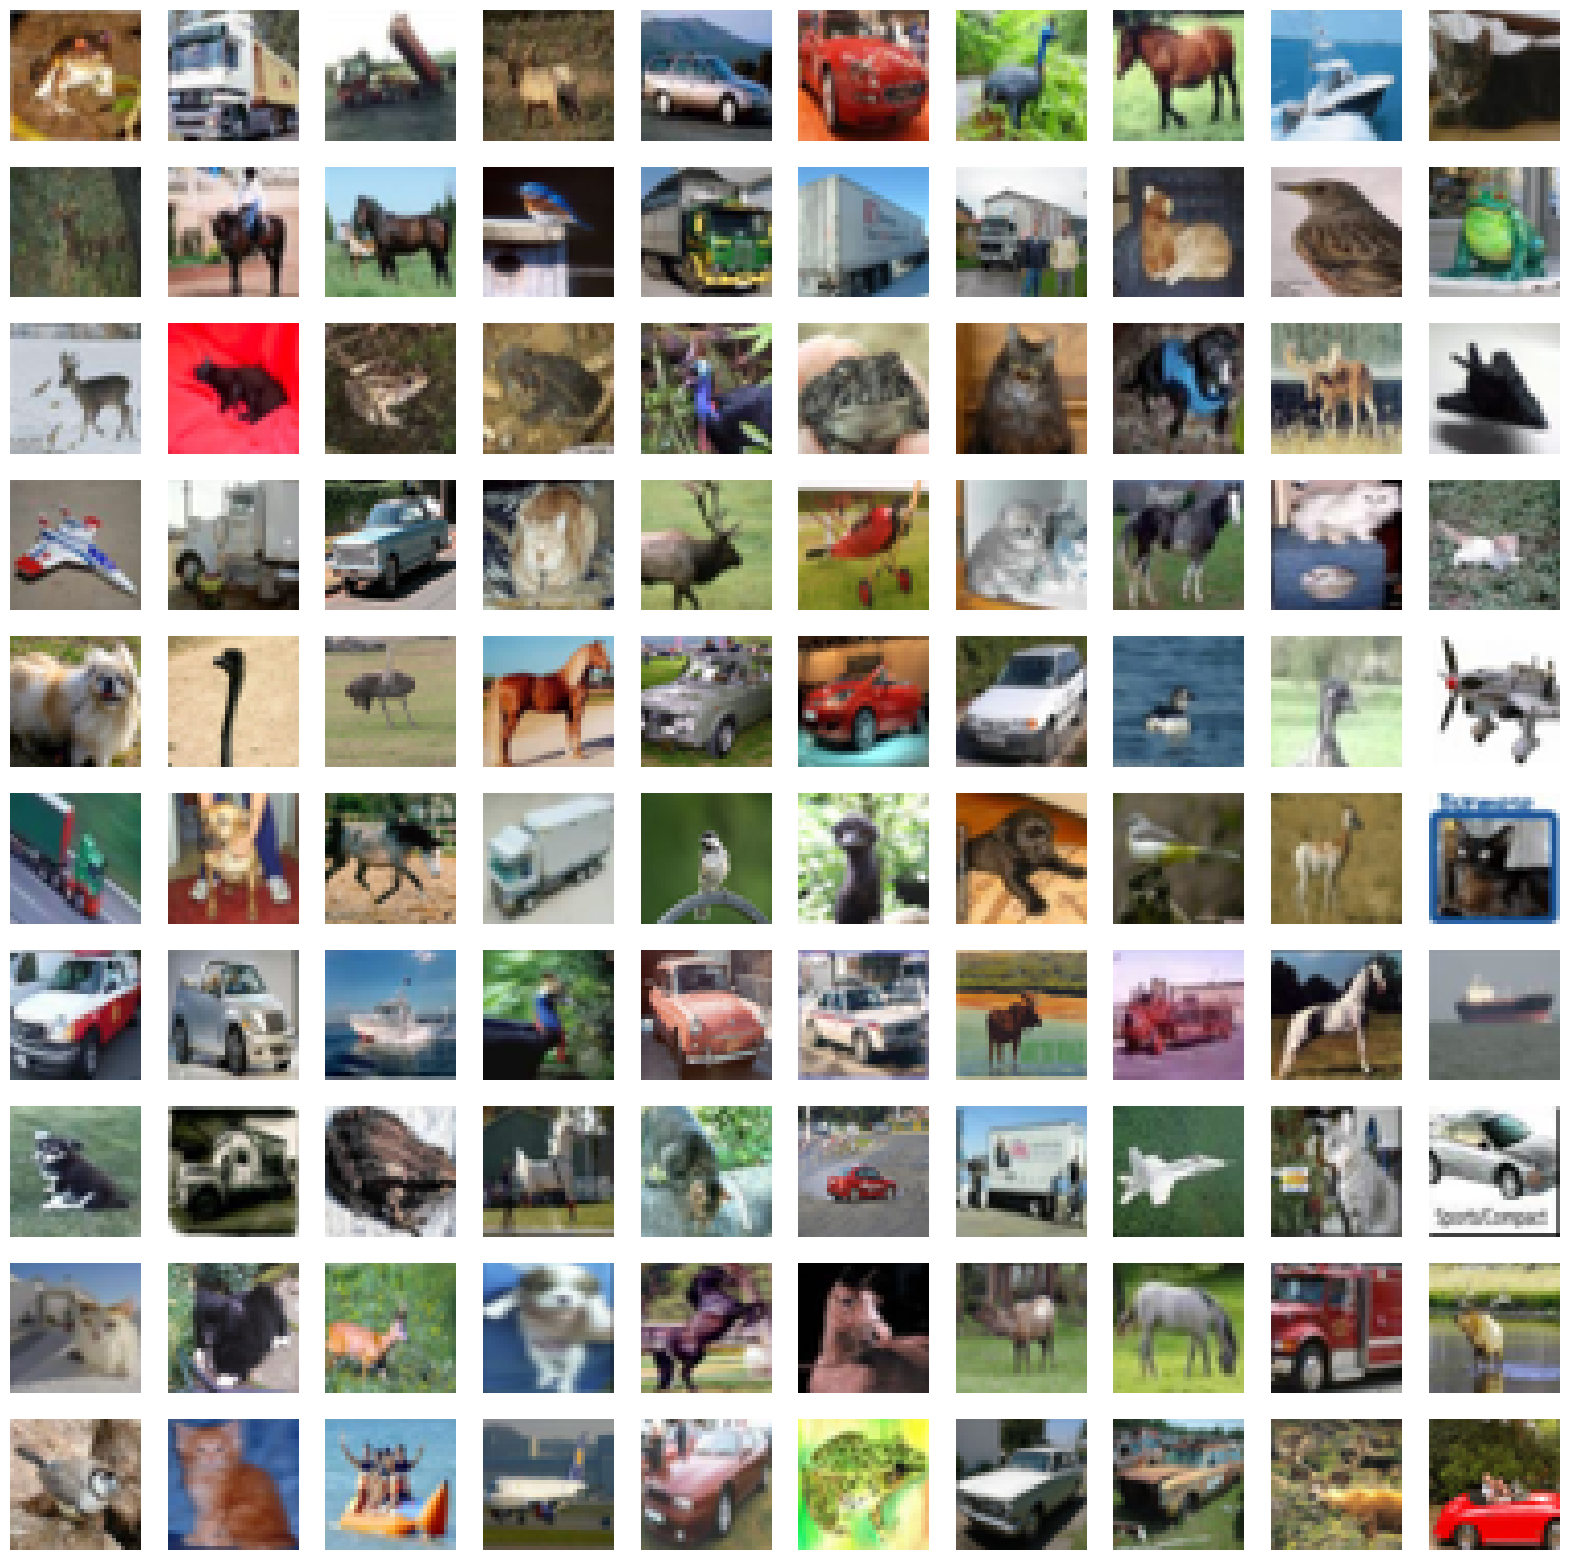

In [14]:
# plot the first 100 images in x_train
import matplotlib.pyplot as plt
# Set the figure size to control the overall size of the grid
plt.figure(figsize=(20, 20))
# Display the first 100 images in 3 rows
for i in range(100):
    plt.subplot(10, 10, i + 1)  # 10 rows, 10 columns, i+1 is the index of the subplot
    plt.imshow(x_train[i], interpolation='nearest')  # Use interpolation for resizing
    plt.axis('off')  # Turn off axis labels for clarity

plt.show()


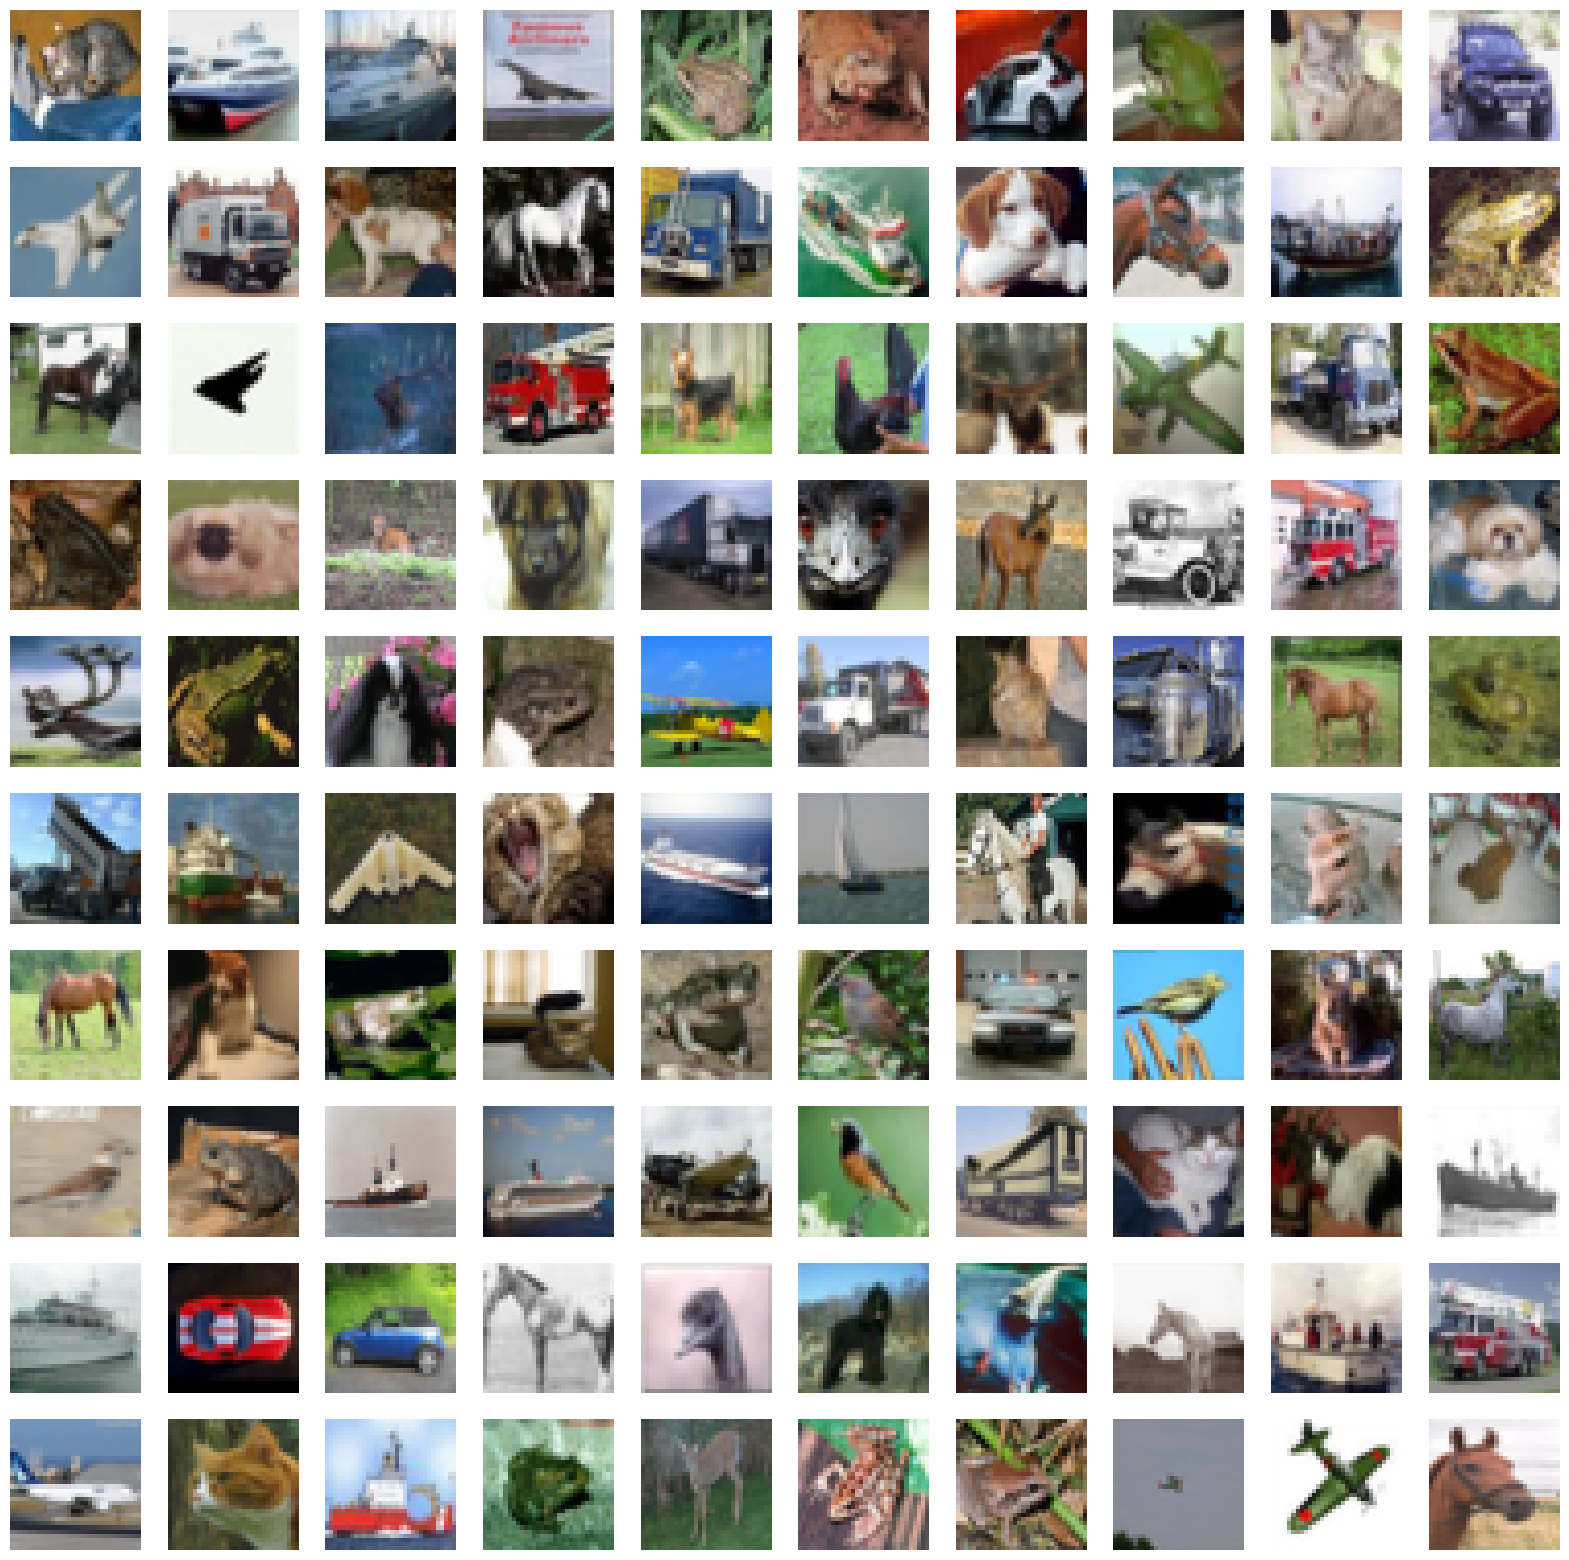

In [15]:
# plot the first 100 images in x_test
import matplotlib.pyplot as plt
# Set the figure size to control the overall size of the grid
plt.figure(figsize=(20, 20))
# Display the first 100 images in 3 rows
for i in range(100):
    plt.subplot(10, 10, i + 1)  # 10 rows, 10 columns, i+1 is the index of the subplot
    plt.imshow(x_test[i], interpolation='nearest')  # Use interpolation for resizing
    plt.axis('off')  # Turn off axis labels for clarity

plt.show()


In [16]:
# classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
# Print the first 10 classes in y_train
for i in range(10):
  print(classes[y_train[i][0]])

frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat


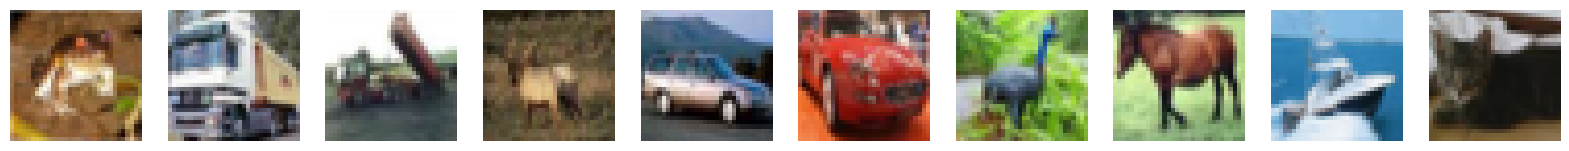

In [18]:
# Plot the first 10 images in x_train
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(1, 10, i + 1)  # 10 rows, 10 columns, i+1 is the index of the subplot
    plt.imshow(x_train[i], interpolation='nearest')  # Use interpolation for resizing
    plt.axis('off')  # Turn off axis labels for clarity

plt.show()

In [19]:
# scale x_train and x_test
x_train=x_train/255
x_test=x_test/255

In [20]:
# Make one hot encoding using keras on y_train and y_test
y_train= keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [21]:
y_test[0][0] # which means class 0

0.0

In [22]:
y_test[7][6] # which means class 1

1.0

In [23]:
# Start building the model
model = keras.Sequential([ # type of model is sequential model
    keras.layers.Flatten(input_shape=(32,32,3)),  # flatten input shape
    keras.layers.Dense(10000,activation='relu'),  # hidden layer with 10000 neurons
    keras.layers.Dense(1000,activation='relu'),   # hidden layer with 1000 neurons
    keras.layers.Dense(100,activation='relu'),    # hidden layer with 100 neurons
    keras.layers.Dense(10,activation='softmax')   # output layer
])

In [24]:
# Make compilation of model
# I am using 'categorical_crossentropy' because I have performed one-hot encoding on the target.
# metric is 'accuracy'
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
# Train the model on 'x_train - y_train'
# The number of iteration is 2 iterations
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1563/1563 [==============================] - 26s 15ms/step - loss: 1.9504 - accuracy: 0.3068
Epoch 2/2
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6773 - accuracy: 0.3962


In [26]:
# Make an evalution on model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6094 - accuracy: 0.4318


[1.6093642711639404, 0.4318000078201294]

In [27]:
# Test the model
prediction = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [28]:
# print the first ten prediction
l_1=[]
for i in range (len(prediction)):

    if i <=9:
        l_1.append(np.argmax(prediction[i]))
print(l_1)

[5, 9, 8, 8, 4, 6, 5, 4, 4, 1]


In [29]:
# print the first 10 values in y_test
y_test_labels = np.argmax(y_test, axis=1)
print(list(y_test_labels[0:10]))

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]


The model successfully predicts only three out of the first 10 values in y_train.

In [30]:
# wrap the model in function to calculate time of trainng with using CPU and GPU
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(10000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(100, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [31]:
# Run using CPU
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 461s 294ms/step - loss: 1.8204 - accuracy: 0.3479
Epoch 2/2
1563/1563 [==============================] - 450s 288ms/step - loss: 1.6186 - accuracy: 0.4268
15min 13s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [32]:
# Run using GPU
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 17s 10ms/step - loss: 1.8213 - accuracy: 0.3457
Epoch 2/2
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6168 - accuracy: 0.4267
43.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


The model takes 15 minutes and 13 seconds on CPU for training, and the model takes only 43.7 seconds on GPU for training